<a href="https://colab.research.google.com/github/fjaviergallucci/mia-ao-ag2/blob/master/Francisco_Gallucci_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Francisco Gallucci <br>
Link:   https://colab.research.google.com/drive/1joMfagtxaD0tihPLigqyWmkLrpDPo79f?usp=sharing <br>
Github: https://github.com/fjaviergallucci/mia-ao-ag2
<br>




In [ ]:
import math

### Programación Dinámica

#### Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

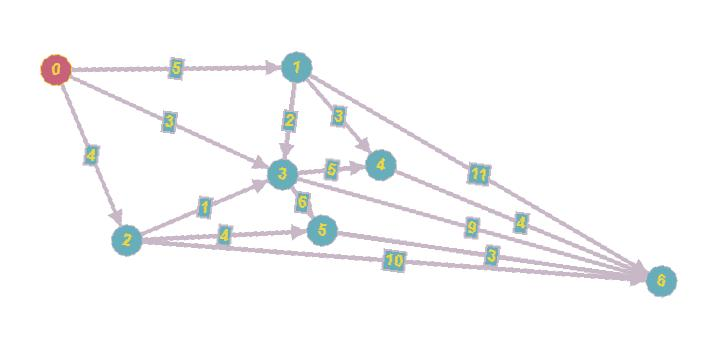

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [14]:
import math
_TARIFAS = [
    [0, 5, 4, 3, 999, 999, 999],  # desde nodo 0
    [999, 0, 999, 2, 3, 999, 11],  # desde nodo 1
    [999, 999, 0, 1, 999, 4, 10],  # desde nodo 2
    [999, 999, 999, 0, 5, 6, 9],  # desde nodo 3
    [999, 999, 999, 999, 0, 999, 4],  # desde nodo 4
    [999, 999, 999, 999, 999, 0, 3],  # desde nodo 5
    [999, 999, 999, 999, 999, 999, 0]  # desde nodo 6
]

print(_TARIFAS)


[[0, 5, 4, 3, 999, 999, 999], [999, 0, 999, 2, 3, 999, 11], [999, 999, 0, 1, 999, 4, 10], [999, 999, 999, 0, 5, 6, 9], [999, 999, 999, 999, 0, 999, 4], [999, 999, 999, 999, 999, 0, 3], [999, 999, 999, 999, 999, 999, 0]]


In [23]:
# Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
def Precios(tarifas):
    # Total de Nodos
    N = len(tarifas[0])

    # Inicialización de la tabla de precios
    precios = [[9999]*N for i in [9999]*N]  # n x n
    ruta = [[""]*N for i in [""]*N]
    
    # Se recorren todos los nodos con dos bucles(origen - destino)
    #  para ir construyendo la matriz de PRECIOS
    for i in range(N-1):
        for j in range(i+1, N):
            mini = tarifas[i][j]
            ruta[i][j] = i

            for k in range(i, j):
                if precios[i][k] + tarifas[k][j] < mini:
                    mini = min(mini, precios[i][k] + tarifas[k][j])
                    ruta[i][j] = k
                precios[i][j] = mini

    return precios, ruta


In [24]:
precios, ruta = Precios(_TARIFAS)
# print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(_TARIFAS)):
    print(precios[i])

print("\nRUTA")
for i in range(len(_TARIFAS)):
    print(ruta[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [31]:
# Calculo de la ruta usando la matriz RUTA
def calcular_ruta(ruta, desde, hasta):
    if desde == ruta[desde][hasta]:
        return desde
    else:
        return str(calcular_ruta(ruta, desde, ruta[desde][hasta])) + ',' + str(ruta[desde][hasta])

print("\nLa ruta es:")
# calcular_ruta(ruta, 3, 6)
calcular_ruta(ruta, 0, 6)


La ruta es:


'0,2,5'

### Ramificación y Poda

#### Problema de Asignacion de tarea

In [6]:
# Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

_COSTES = [[11, 12, 18, 40],
          [14, 15, 13, 22],
          [11, 17, 19, 23],
          [17, 14, 20, 28]]

In [7]:
# Calculo del valor de una solucion parcial
def valor(s, costes):
    valor = 0
    for i in range(len(s)):
        valor += costes[s[i]][i]
    return valor

valor((3, 2,), _COSTES)

34

In [8]:
# Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1
def CI(s, costes):
    valor = 0
    # Valores establecidos
    for i in range(len(s)):
        valor += costes[i][s[i]]

    # Estimacion
    for i in range(len(s), len(costes)):
        valor += min([costes[j][i] for j in range(len(s), len(costes))])
    return valor

def CS(s, costes):
    valor = 0
    # Valores establecidos
    for i in range(len(s)):
        valor += costes[i][s[i]]

    # Estimacion
    for i in range(len(s), len(costes)):
        valor += max([costes[j][i] for j in range(len(s), len(costes))])
    return valor

# print(CI((3, 2, 0, 4, 1), _COSTES))

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(nodo, n):
  hijos = []
  for i in range(n ):
    if i not in nodo:
      hijos.append({'s':nodo +(i,)    })
  return hijos

In [8]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [10]:
def ramificacion_y_poda(costes):
    # Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
    # Nodos del grafo  { s:(1,2),CI:3,CS:5  }
    # print(COSTES)
    dimension = len(costes)
    mejor_solucion = tuple(i for i in range(len(costes)))
    CotaSup = valor(mejor_solucion, costes)
    #print("Cota Superior:", CotaSup)

    nodos = []
    nodos.append({'s': (), 'ci': CI((), costes)})

    iteracion = 0

    while(len(nodos) > 0):
        iteracion += 1

        nodo_prometedor = [min(nodos, key=lambda x:x['ci'])][0]['s']
        #print("Nodo prometedor:", nodo_prometedor)

        # Ramificacion
        # Se generan los hijos
        HIJOS = [{'s': x['s'], 'ci':CI(x['s'], costes)}
                 for x in crear_hijos(nodo_prometedor, dimension)]

        # Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == dimension]
        if len(NODO_FINAL) > 0:
            #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                mejor_solucion = NODO_FINAL

        # Poda
        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

        # Añadimos los hijos
        nodos.extend(HIJOS)

        # Eliminamos el nodo ramificado
        nodos = [x for x in nodos if x['s'] != nodo_prometedor]

    print("La solucion final es:", mejor_solucion, " en ",
          iteracion, " iteraciones", " para dimension: ", dimension)


ramificacion_y_poda(_COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


La solucion final es: [{'s': (2, 4, 0, 1, 3), 'ci': 25}]  en  26  iteraciones  para dimension:  5
La mejor solucion es : (2, 3, 0, 4, 1). Con valor: 25
Ramificacion y Poda tiempo total 0.0007443428039550781 con 5 dimensiones
Fuerza brutal tiempo total 8.296966552734375e-05 con 5 dimensiones

La solucion final es: [{'s': (2, 3, 1, 0, 5, 4), 'ci': 30}]  en  364  iteraciones  para dimension:  6
La mejor solucion es : (3, 2, 0, 1, 5, 4). Con valor: 30
Ramificacion y Poda tiempo total 0.009455442428588867 con 6 dimensiones
Fuerza brutal tiempo total 0.0007798671722412109 con 6 dimensiones

La solucion final es: [{'s': (5, 2, 1, 0, 3, 6, 4), 'ci': 37}]  en  118  iteraciones  para dimension:  7
La mejor solucion es : (4, 2, 1, 6, 3, 0, 5). Con valor: 35
Ramificacion y Poda tiempo total 0.0020112991333007812 con 7 dimensiones
Fuerza brutal tiempo total 0.003652811050415039 con 7 dimensiones

La solucion final es: [{'s': (1, 6, 4, 7, 3, 0, 5, 2), 'ci': 32}]  en  277  iteraciones  para dimension

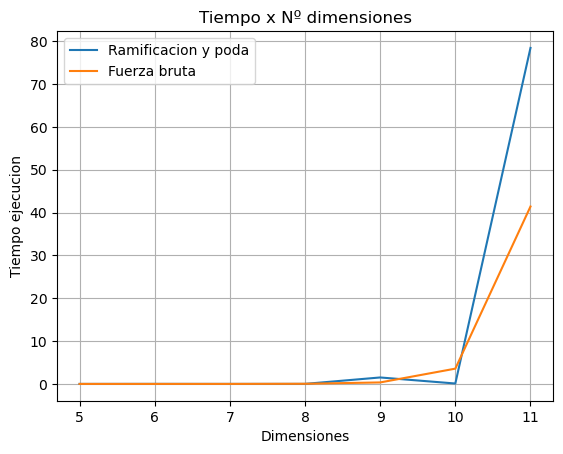

In [14]:
from time import time
import random
import matplotlib.pyplot as plt
from IPython.display import display
import itertools

def fuerza_bruta(costes):
    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(costes)))):
        valor_tmp = valor(s, costes)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    print(f'La mejor solucion es : {mejor_solucion}. Con valor: {mejor_valor}')

def generate_costs(dimension):
    return [[random.randint(1, 20) for _ in range(dimension)] for _ in range(dimension)]

#Ejes y lineas para el plot
dimension = []
tiempo_fuerza_bruta = []
tiempo_ramificaion_poda = []

for i in range(5, 12):
    _COSTES = generate_costs(i)
    # display(_COSTES)
    dimension.append(i)

    start_time_r_p = time()
    ramificacion_y_poda(_COSTES)
    end_time_r_p = time()
    tiempo_ramificaion_poda.append(end_time_r_p - start_time_r_p)

    start_time_f_b = time()
    fuerza_bruta(_COSTES)
    end_time_f_b = time()
    tiempo_fuerza_bruta.append(end_time_f_b - start_time_f_b)

    print(f'Ramificacion y Poda tiempo total {end_time_r_p - start_time_r_p} con {i} dimensiones')
    print(f'Fuerza brutal tiempo total {end_time_f_b - start_time_f_b} con {i} dimensiones\n')


plt.plot(dimension, tiempo_ramificaion_poda, label="Ramificacion y poda")
plt.plot(dimension, tiempo_fuerza_bruta, label="Fuerza bruta")
plt.xlabel("Dimensiones")  # add X-axis label
plt.ylabel("Tiempo ejecucion")  # add Y-axis label
plt.title("Tiempo x Nº dimensiones")  # add title
plt.grid()
plt.legend()
plt.show()

### Descenso del gradiente

In [2]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
# Definimos la funcion
# Paraboloide
def f(X): return X[0]**2 + X[1]**2  # Funcion
# def df(X): return [2*X[0], 2*X[1]]  # Gradiente


# df([1, 2])


[2, 4]

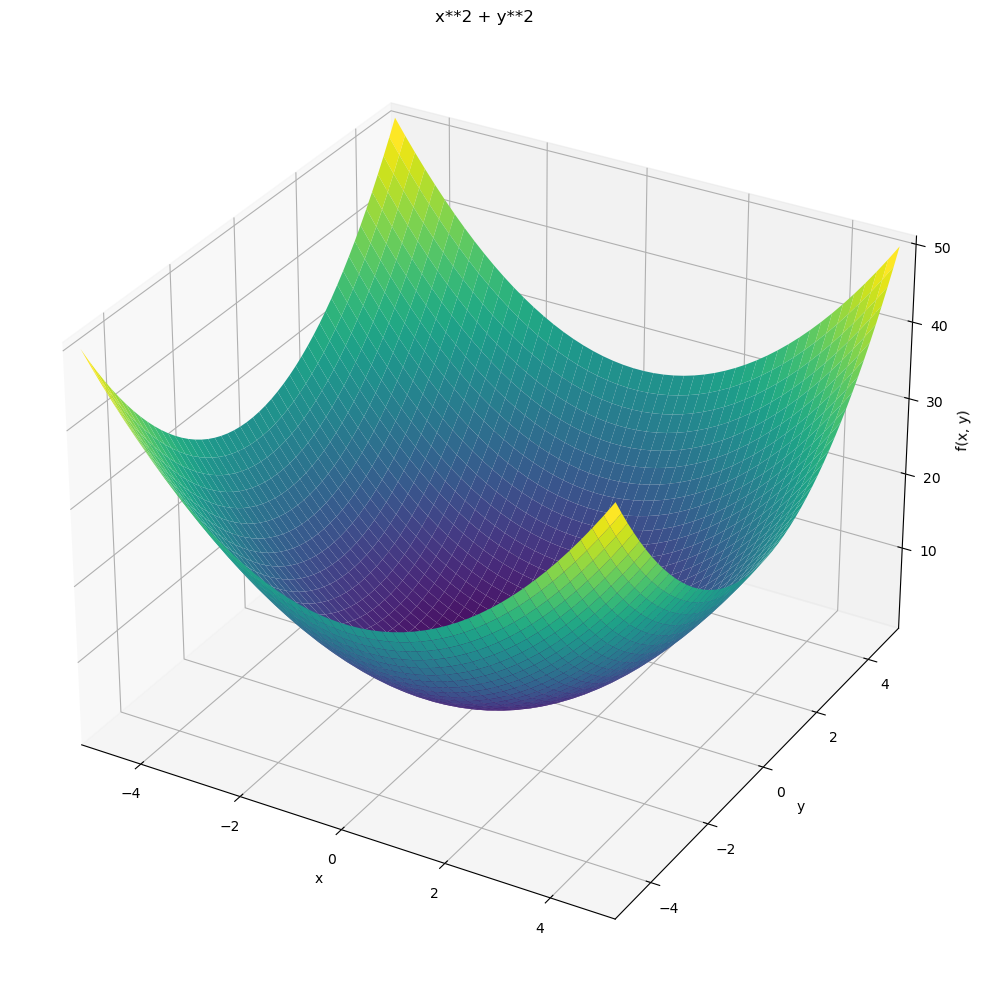

In [3]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x, y = symbols('x y')
plot3d(x**2 + y**2,
       (x, -5, 5), (y, -5, 5),
       title='x**2 + y**2',
       size=(10, 10))


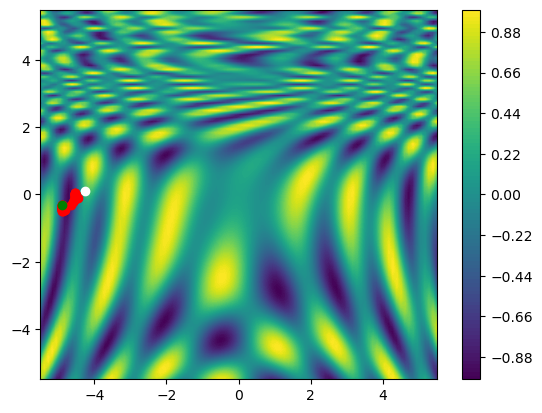

Solucion: [-4.9008042738603885, -0.3191304685000348] -0.6591942084052138


In [4]:
# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = .1

# Iteraciones:50
for _ in range(50):
    grad = df(P)
    # print(P,grad)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solucion:", P, f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
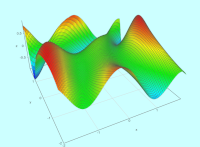


In [1]:
# Definimos la funcion
def f(X): return math.sin(1/2 * X[0]**2 - 1/4 * X[1]
                          ** 2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

def df(punto):
    h = 0.001
    T = np.copy(punto)
    grad = np.zeros(2)
    for it, th in enumerate(punto):
        T[it] = T[it] + h
        grad[it] = (f(T) - f(punto)) / h
    return grad
